In [1]:
# Required imports
import numpy as np
import pandas as pd
from pathlib import Path
import os
import duckdb
import warnings
warnings.filterwarnings('ignore')
%matplotlib widget
import matplotlib.pyplot as plt
import mplcursors  

from factor_tools import create_extended_analysis_data
from backtest_tools import (
    CommissionModel, 
    FixedSlippageModel,
    BrokersModel,
    Trading,
    Backtest,
    load_distribution_data
)

In [2]:
# Analysis parameters
ANALYSIS_PARAMS = {
    'start_date': '2021-11-01',
    'end_date': '2023-04-30',
    'factor_name': ['roe'],
    'stock_num': 10,
    'rebalance_freq': '1d'
}

In [3]:
# Load data
data_df_dic, trading_dates = create_extended_analysis_data(
    ANALYSIS_PARAMS['start_date'],
    ANALYSIS_PARAMS['end_date'],
    ANALYSIS_PARAMS['factor_name'],
    'wrds_data.db',
    'factor_data'
)

# Load distribution data
distribution_data = load_distribution_data(
    ANALYSIS_PARAMS['start_date'],
    ANALYSIS_PARAMS['end_date']
)



Processing dates: 100%|██████████| 376/376 [00:03<00:00, 103.92it/s]


In [4]:
commission_model = BrokersModel()
slippagemodel = FixedSlippageModel(0.005)

In [5]:
# Initialize and run backtest
backtest = Backtest(
    cash=10000000,  # Initial cash
    commission_model=commission_model,
    slippage_model= slippagemodel,
    data_df_dic=data_df_dic,
    trading_dates=trading_dates,
    distribution_data=distribution_data,
    factor_list=ANALYSIS_PARAMS['factor_name'],
    dir_='backtest_results',
    save_format='html',
    stock_num=ANALYSIS_PARAMS.get('stock_num', 10),
    margin_rate=0.06,
    rebalance_freq=ANALYSIS_PARAMS.get('rebalance_freq', '1d'),
    rebalance_day=1,
    min_price=2.0,
    market_cap_percentile=0.05,
    #buy_and_hold_list=buy_and_hold
)

# No need for additional parameter setting
backtest.backtest()

Starting backtest...


100%|██████████| 375/375 [00:05<00:00, 70.44it/s]

Backtest completed.


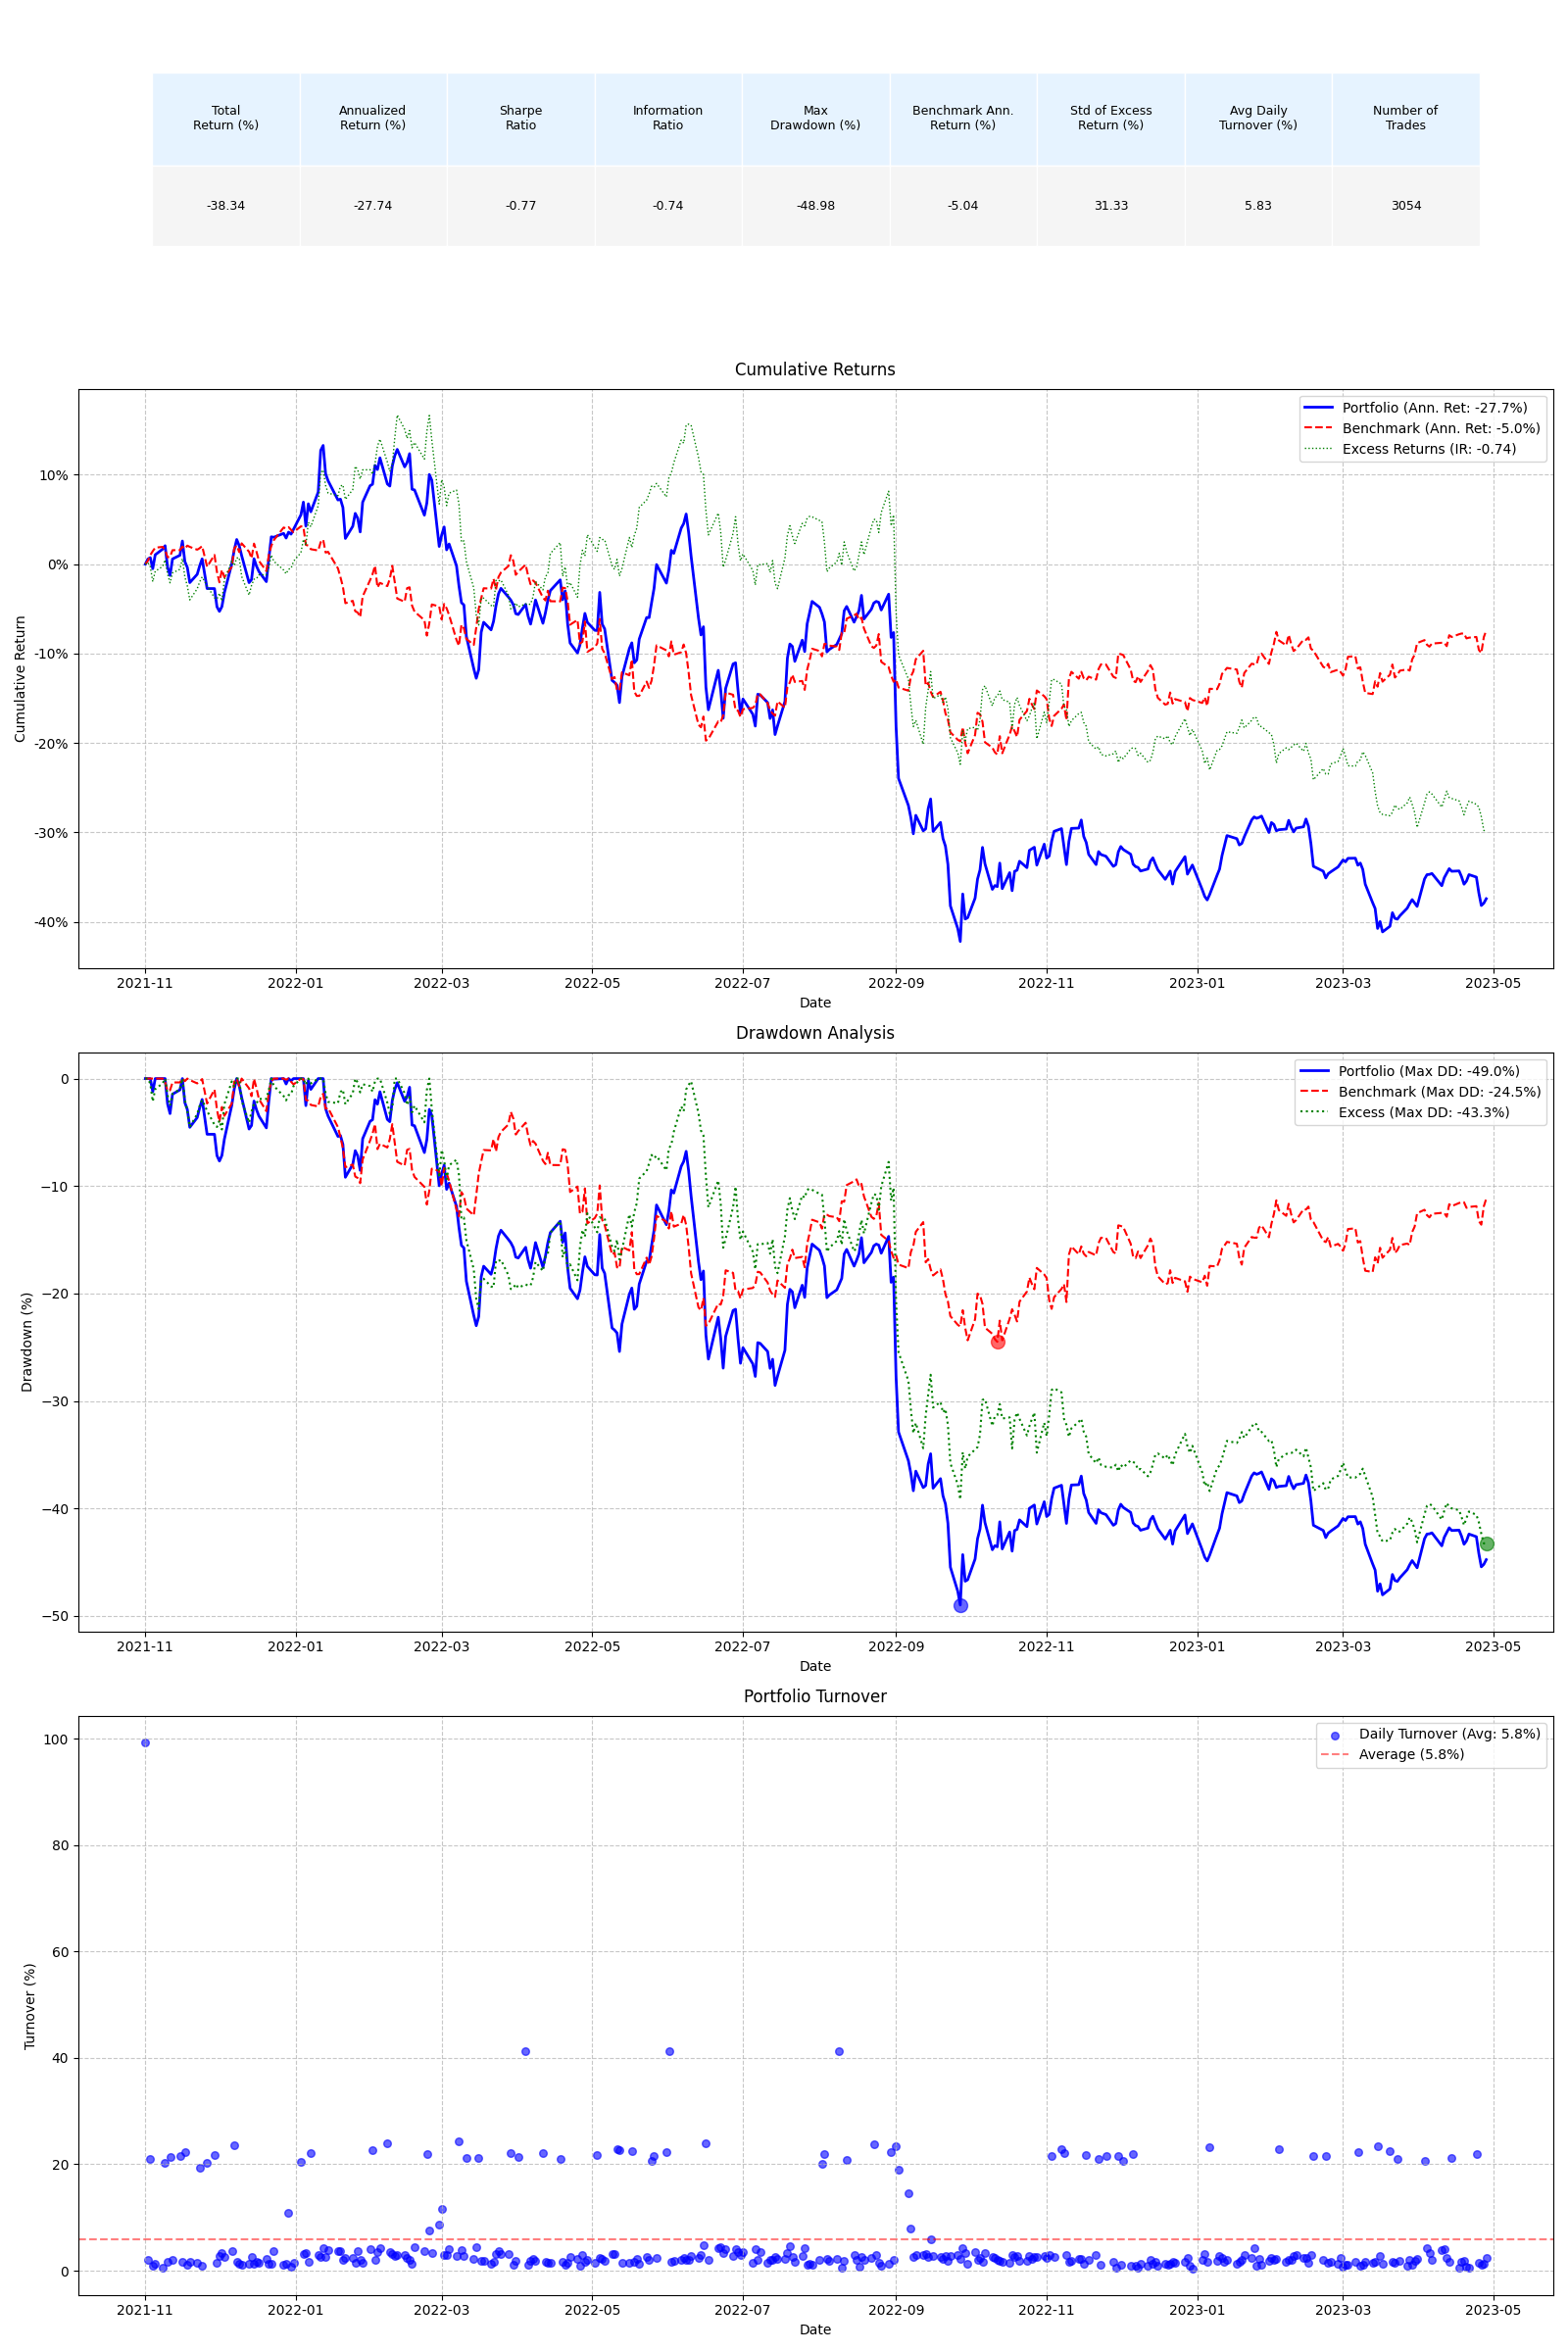

In [6]:
backtest.plot_performance_summary(interactive=True)
plt.show()

In [7]:
backtest.save_performance_summary_pdfs(output_dir='backtest_results',
    dpi=2400)

PDF files have been saved to backtest_results/:
├── 1_metrics_table.pdf
├── 2_cumulative_returns.pdf
├── 3_drawdown_analysis.pdf
└── 4_turnover_analysis.pdf


In [8]:
# Example buy and hold portfolio
'''
buy_and_hold_test_C2 = {
    14593: 0.4,
    16437: 0.2,
    14450: 0.2,
    89349: 0.2,
#2020-06-01-2020-08-31
}
buy_and_hold_test_CS = {
    14593: 0.4,
    80711: 0.2,
    75152: 0.1,
    15950: 0.1, 
    14252: 0.1,
    25129: 0.1
#2020-11-01-2020-12-31
}
buy_and_hold_test_M2MU = {
    14593: 0.1,
    18790:0.1,
    89942:0.1,
    16836:0.1,
    89901:0.1,
    17016:0.1,
    92910:0.1,
    10065:0.1,
    15282:0.1,
    91278:0.1
#2020-09-01-2020-12-31
}
buy_and_hold_test_O1P1 = {
    14593: 0.5,
    49680:0.1,
    26825:0.1,
    88233:0.1,
    17250:0.1,
    88901:0.1
#2023-09-01-2023-11-30
}
buy_and_hold_D1D2 = {
    14593: 0.4,
    12413:0.1,
    13191:0.1,
    81560:0.1,
    90499:0.1,
    20807:0.1,
    14433:0.1
#2022-03-01-2022-04-30
}
buy_and_hold_suspended = {
    14593: 0.4,
    20740: 0.2,
    21847: 0.2,
    14127: 0.2
#2021-11-01-2023-04-30
}
buy_and_hold = {
    14593: 0.4,
    20740: 0.2,
    21847: 0.2,
    14127: 0.2,
    16437: 0.2,
    14450: 0.2,
    89349: 0.2,
    12413:0.1,
    13191:0.1,
    81560:0.1,
    90499:0.1,
    20807:0.1,
    14433:0.1,
    49680:0.1,
    26825:0.1,
    88233:0.1,
    17250:0.1,
    88901:0.1,
    18790:0.1,
    89942:0.1,
    16836:0.1,
    89901:0.1,
    17016:0.1,
    92910:0.1,
    10065:0.1,
    15282:0.1,
    91278:0.1,
    80711: 0.2,
    75152: 0.1,
    15950: 0.1, 
    14252: 0.1,
    25129: 0.1,
#2021-11-01-2023-04-30
}
'''


'\nbuy_and_hold_test_C2 = {\n    14593: 0.4,\n    16437: 0.2,\n    14450: 0.2,\n    89349: 0.2,\n#2020-06-01-2020-08-31\n}\nbuy_and_hold_test_CS = {\n    14593: 0.4,\n    80711: 0.2,\n    75152: 0.1,\n    15950: 0.1, \n    14252: 0.1,\n    25129: 0.1\n#2020-11-01-2020-12-31\n}\nbuy_and_hold_test_M2MU = {\n    14593: 0.1,\n    18790:0.1,\n    89942:0.1,\n    16836:0.1,\n    89901:0.1,\n    17016:0.1,\n    92910:0.1,\n    10065:0.1,\n    15282:0.1,\n    91278:0.1\n#2020-09-01-2020-12-31\n}\nbuy_and_hold_test_O1P1 = {\n    14593: 0.5,\n    49680:0.1,\n    26825:0.1,\n    88233:0.1,\n    17250:0.1,\n    88901:0.1\n#2023-09-01-2023-11-30\n}\nbuy_and_hold_D1D2 = {\n    14593: 0.4,\n    12413:0.1,\n    13191:0.1,\n    81560:0.1,\n    90499:0.1,\n    20807:0.1,\n    14433:0.1\n#2022-03-01-2022-04-30\n}\nbuy_and_hold_suspended = {\n    14593: 0.4,\n    20740: 0.2,\n    21847: 0.2,\n    14127: 0.2\n#2021-11-01-2023-04-30\n}\nbuy_and_hold = {\n    14593: 0.4,\n    20740: 0.2,\n    21847: 0.2,\n  